# Linear systems stability: condition number of a matrix

<img src="../Images/1_1.jpg" alt="Markdown Monster icon" align="left" width="700"/>

Matrix Factorizations

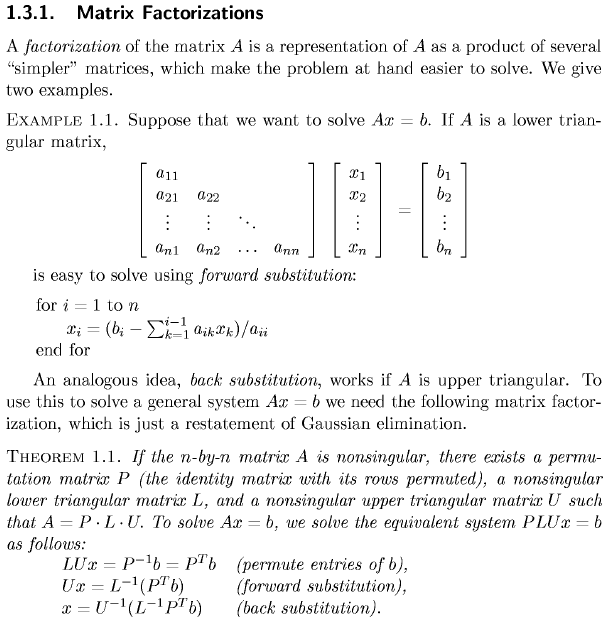

Condition Number

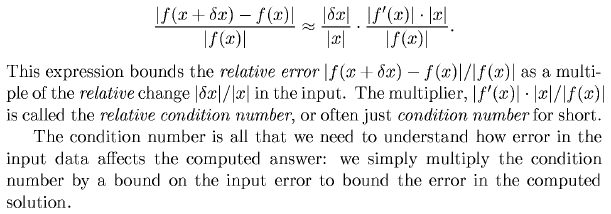

## Vandermonde matrix

<img src="../Images/1_2.jpg" alt="Markdown Monster icon" align="left" width="700"/>

a)

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook

In [2]:
def condition_number(A):
    k = LA.norm(A,2) * LA.norm(LA.inv(A),2)
    return k
def vander(N):
    x = np.array([1 - 2*(i - 1)/(N - 1) for i in range(N)])
    A = np.vander(x, len(x), increasing=True).T
    return A

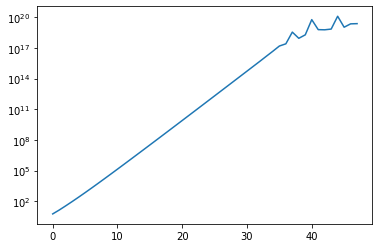

In [3]:
l = []
for i in range(2,50):
    l.append(condition_number(vander(i)))
plt.plot(l)
plt.yscale('log')
plt.show()

b)

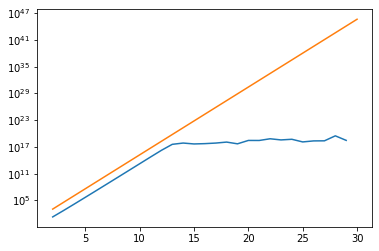

In [4]:
def hilbert_matrix(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range (n):
            H[i,j]=1./(i+j+1)
    return H

# hilbert_matrix(5)
l = []
for i in range(2,30):
    l.append(condition_number(hilbert_matrix(i)))
plt.plot(range(2,30), l)

x = np.linspace(2, 30, 100)
plt.plot(x, np.exp(3.5*x))

plt.yscale('log')
plt.show()

## Linear System

<img src="../Images/1_3.jpg" alt="Markdown Monster icon" align="left" width="700"/>

In [5]:
def frank(n):
    A = np.zeros((n,n))
    for i in range (0,n):
        for j in range (0,n):
            if(i<=j):
                A[i,j] = float(n-j)
            elif(j==i-1):
                A[i,j] = float(n-j-1)
    return A

In [29]:
nmin,nmax=2,24
eps=1.e-16  #we assume that the error in b is Delta_b = eps_machine (double precision)
# print('n \t cond(A) \t\t eps*cond(A) \t\t xsol-x \n'); 
data = np.zeros((nmax-nmin, 4))
for n in range(nmin,nmax):
    A=frank(n)
    x=np.ones(n)
    b=np.dot(A,x)
    xsol=np.linalg.solve(A,b)
#     print('%2d %24.16e %24.16e %24.16e' % (n,np.linalg.cond(A),eps*np.linalg.cond(A), np.linalg.norm(xsol-x)/np.linalg.norm(x)))
    data[n-nmin]=[n,np.linalg.cond(A),eps*np.linalg.cond(A), np.linalg.norm(xsol-x)/np.linalg.norm(x)]

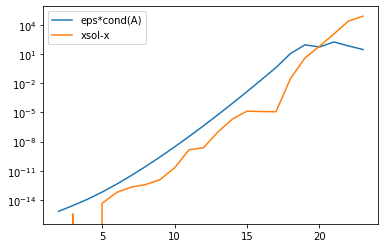

In [7]:
# plt.plot(data[:,0],data[:,1], label='cond(A)')
plt.plot(data[:,0],data[:,2], label='eps*cond(A)')
plt.plot(data[:,0],data[:,3], label='xsol-x')
plt.legend(loc='upper left')
plt.yscale("log")
plt.show()

explain the result using bacward propagation formula ... ?

## Moral: It is inadvisable to actually compute A-1

<img src="../Images/1_4.jpg" alt="Markdown Monster icon" align="left" width="700"/>

<img src="../Images/1_5.jpg" alt="Markdown Monster icon" align="left" width="700"/>

In [22]:
def generate_A(n=50, alfa = 9e7):
    B = np.random.normal(0,1,(n,n))
    Q,R=np.linalg.qr(B)
    D = np.identity(n)
    D[0,0] = alfa
    A = np.dot(np.dot(Q.T,D),Q)
    return A

In [27]:
import time
nsys=10000
total_time = 0.0
for isys in tqdm(range(0,nsys)):
    A = generate_A()
    x = np.random.normal(0,1,n)
    b = np.dot(A,x)
    #b = Ax
    start_time = time.clock()
    iA = np.linalg.inv(A)
    x1 = np.dot(iA,b)  
    end_time = time.clock()
    total_time += end_time - start_time
print("Invt time", np.round(1000*(total_time),2), "ms")


Invt time 706.18 ms


In [28]:
total_time = 0.0
for isys in tqdm(range(0,nsys)):
    A = generate_A()
    x = np.random.normal(0,1,n)
    b = np.dot(A,x)
    #b = Ax
    start_time = time.clock()
    x=np.random.normal(0,1,n) 
    x2 = np.linalg.solve(A,b)
    end_time = time.clock()
    total_time += end_time - start_time
print("GEPP time", np.round(1000*(total_time),2), "ms")


GEPP time 591.7 ms


In [11]:
from tqdm import tqdm_notebook as tqdm
nsys=10000
nor1=np.zeros(nsys)
nor2=np.zeros(nsys)
for isys in tqdm(range(0,nsys)):
    A=np.zeros((n,n))
    Q=np.zeros((n,n))
    x=np.random.normal(0,1,n)
    
    for i in range (0,n):
        for j in range (0,n):
            A[i,j]=np.random.normal(0,1)
    
    Q,R=np.linalg.qr(A)
    B=np.eye(n)         #Returns a 2d array with ones in the diagonal and zeros outside
    B[0,0]=9e7          #Value of the condition number 
    A=np.dot(np.dot(Q.T,B),Q)
    b=np.dot(A,x)
   
    
    iA=np.linalg.inv(A); x1=np.dot(iA,b)   #Direct inversion method
    x2=np.linalg.solve(A,b)                #GEPP (computes LU factorization and solves the linear system)
    
    r1=np.dot(A,x1)-b;  r2=np.dot(A,x2)-b  #residues
    nr1=np.linalg.norm(r1,np.inf);  nr2=np.linalg.norm(r2,np.inf)  #residue norms
    nA=np.linalg.norm(A,np.inf)  #norm of A
    nb=np.linalg.norm(b,np.inf)  #norm of b
    nx1=np.linalg.norm(x1,np.inf);  nx2=np.linalg.norm(x2,np.inf)  #solution norms
    nor1[isys]=nr1/(nA*nx1+nb);  nor2[isys]=nr2/(nA*nx2+nb)  #array of normwise backward errors
print('Direct invert method solutions, min and max normwise backward error: \n %24.16e %24.16e \n\n GEPP (LU), min and max normwise backward error: \n %24.16e %24.16e\n' % (np.amin(nor1), np.amax(nor1), np.amin(nor2), np.amax(nor2)))


Direct invert method solutions, min and max normwise backward error: 
   2.6274719664980300e-15   2.8896062730372939e-09 

 GEPP (LU), min and max normwise backward error: 
   6.0002799487930654e-19   1.6834199493977816e-16



<div class = "alert alert-success" style="border-radius:10px;border-width:3px">Results:
<ol>
<li> GEPP is faster than Invert method </li>
<li> GEPP is more accurate and stable than Inver</li>
</ol>
</div>

# Block matrices and partitioned algorithms

<img src="../Images/2_1.jpg" alt="Markdown Monster icon" align="left" width="700"/>

## Ex1 - block matrix multiplication algorithm

<img src="../Images/2_2.jpg" alt="Markdown Monster icon" align="left" width="700"/>

In [ ]:
def block_matrix_mult(A,B,b):
    C = np.empty(shape=(n,n))
    N = int(A.shape[0]/b)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for ii in range(i*b, (i+1)*b):
                    for jj in range(j*b, (j+1)*b):
                        for kk in range(k*b, (k+1)*b):
                            C[ii,jj] = A[ii,kk]*B[kk,jj]
    return C

In [ ]:
A = np.random.rand(4,4)
B = np.random.rand(4,4)
C = block_matrix_mult(A,B,2)
display(A)
display(B)
display(np.empty(shape=(n,n)))

## Ex2 - block-partitioned LU algorithm

<img src="../Images/2_3.jpg" alt="Markdown Monster icon" align="left" width="700"/>

# Algorithms for symmetric, banded and sparse matrices

<img src="../Images/3_1.jpg" alt="Markdown Monster icon" align="left" width="700"/>

## Banded Systems

<img src="../Images/3_2.jpg" alt="Markdown Monster icon" align="left" width="700"/>

## Sparse Systems

<img src="../Images/3_3.jpg" alt="Markdown Monster icon" align="left" width="700"/>

<img src="../Images/3_4.jpg" alt="Markdown Monster icon" align="left" width="700"/>